# **DOG Rating Generation**

## **1.0: Introduction**
The purpose of this notebook is to generate the DOG rating for both Defenders and Ball Carriers

### **1.1: Module and Data Load**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [78]:
dog_feature_set_1 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/dog_feature_set_1.csv')
players = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/players.csv')

In [79]:
dog_feature_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gameId            9720 non-null   int64  
 1   playId            9720 non-null   int64  
 2   nflId             9720 non-null   int64  
 3   tackle            9720 non-null   int64  
 4   assist            9720 non-null   int64  
 5   forcedFumble      9720 non-null   int64  
 6   pff_missedTackle  9720 non-null   int64  
 7   game_play_Id      9720 non-null   object 
 8   event_type        9720 non-null   float64
 9   s_avg_05          9720 non-null   float64
 10  s_avg_1           9720 non-null   float64
 11  bc_s_avg_05       9720 non-null   float64
 12  bc_s_avg_1        9720 non-null   float64
 13  cos_avg_05        9720 non-null   float64
 14  cos_avg_1         9720 non-null   float64
 15  do_avg_05         9720 non-null   float64
 16  do_avg_1          9720 non-null   float64


In [48]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   height       1683 non-null   object
 2   weight       1683 non-null   int64 
 3   birthDate    1204 non-null   object
 4   collegeName  1683 non-null   object
 5   position     1683 non-null   object
 6   displayName  1683 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.2+ KB


## **2.0: Calculating DOG Rating**

DOG Rating D = (For Made Tackle: Max(Weighted_BTOE, 0)) + (For Missed Tackle: Min(Weighted_BTOE, 0))
DOG Rating O = (For Broken Tackle: Max(Weighted_TOE, 0)) + (For Getting Tackled: Min(Weighted_TOE, 0))

**Adding Week of Game to dog_feature_set_1**

In [17]:
games = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/games.csv')

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


In [80]:
dog_feature_set_1 = dog_feature_set_1.merge(games[['gameId', 'week']], on='gameId', how='left')

In [81]:
dog_feature_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gameId            9720 non-null   int64  
 1   playId            9720 non-null   int64  
 2   nflId             9720 non-null   int64  
 3   tackle            9720 non-null   int64  
 4   assist            9720 non-null   int64  
 5   forcedFumble      9720 non-null   int64  
 6   pff_missedTackle  9720 non-null   int64  
 7   game_play_Id      9720 non-null   object 
 8   event_type        9720 non-null   float64
 9   s_avg_05          9720 non-null   float64
 10  s_avg_1           9720 non-null   float64
 11  bc_s_avg_05       9720 non-null   float64
 12  bc_s_avg_1        9720 non-null   float64
 13  cos_avg_05        9720 non-null   float64
 14  cos_avg_1         9720 non-null   float64
 15  do_avg_05         9720 non-null   float64
 16  do_avg_1          9720 non-null   float64


In [83]:
dog_feature_set_1.head(50)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,game_play_Id,event_type,s_avg_05,s_avg_1,bc_s_avg_05,bc_s_avg_1,cos_avg_05,cos_avg_1,do_avg_05,do_avg_1,bc_do_avg_05,bc_do_avg_1,cos_05_null,cos_1_null,ballCarrierId,tackle_status,weighted_toe,weighted_btoe,week
0,2022090800,101,42816,1,0,0,0,2022090800_101,1.0,3.520,4.332,5.694,6.830,0.428826,-0.385109,0.832711,0.645022,0.691600,0.929311,0,0,47857,1,0.000000,1.285714,1
1,2022090800,393,46232,1,0,0,0,2022090800_393,1.0,2.164,1.706,0.298,0.336,0.985862,0.787554,0.287244,0.604378,-0.093511,-0.303400,0,0,47853,1,0.000000,0.257143,1
2,2022090800,486,40166,1,0,0,0,2022090800_486,1.0,2.332,2.274,3.000,2.376,0.995057,0.993806,-0.236111,0.522356,-0.263867,0.533244,0,0,44881,1,0.000000,0.242857,1
3,2022090800,646,47939,1,0,0,0,2022090800_646,1.0,4.274,5.334,4.364,5.720,0.975704,0.987113,0.287667,0.059622,-0.590022,0.458689,0,0,47879,1,-0.210526,0.000000,1
4,2022090800,818,40107,1,0,0,0,2022090800_818,1.0,0.854,1.828,1.448,2.134,0.191356,0.563645,0.215956,0.442644,-0.301644,-0.653667,0,0,47853,1,0.000000,0.257143,1
5,2022090800,1736,44976,1,0,0,0,2022090800_1736,1.0,4.794,4.612,4.398,4.650,0.124383,-0.728045,0.702711,0.598533,0.302244,0.916533,0,0,52460,1,-0.526316,0.428571,1
6,2022090800,2860,46085,1,0,0,0,2022090800_2860,1.0,2.492,3.170,3.390,2.560,0.760174,-0.071476,0.523244,0.854733,0.882800,0.675067,0,0,44881,1,0.631579,0.242857,1
7,2022090800,3145,52647,1,0,0,0,2022090800_3145,1.0,2.526,1.584,2.538,1.270,0.758493,0.166756,0.320667,0.658911,-0.696578,-0.292800,0,0,47853,1,0.000000,0.257143,1
8,2022090800,3362,46190,1,0,0,0,2022090800_3362,1.0,4.638,4.050,3.230,4.426,-0.812444,-0.984762,0.184089,0.618489,0.726556,0.890378,0,0,47853,1,0.000000,0.257143,1
9,2022090800,3383,54488,1,0,0,0,2022090800_3383,1.0,2.106,1.668,2.210,1.382,0.992764,0.930209,0.496000,0.318089,-0.221467,-0.341511,0,0,44881,1,0.000000,0.242857,1


In [84]:
dog_feature_set_1.tackle_status.value_counts(normalize=True)

tackle_status
1    0.805967
0    0.194033
Name: proportion, dtype: float64

### **2.1: DOG Rating Function D**

In [85]:
pd.set_option('display.max_columns', None)
dog_feature_set_1.head(5)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,game_play_Id,event_type,s_avg_05,s_avg_1,bc_s_avg_05,bc_s_avg_1,cos_avg_05,cos_avg_1,do_avg_05,do_avg_1,bc_do_avg_05,bc_do_avg_1,cos_05_null,cos_1_null,ballCarrierId,tackle_status,weighted_toe,weighted_btoe,week
0,2022090800,101,42816,1,0,0,0,2022090800_101,1.0,3.520,4.332,5.694,6.830,0.428826,-0.385109,0.832711,0.645022,0.691600,0.929311,0,0,47857,1,0.000000,1.285714,1
1,2022090800,393,46232,1,0,0,0,2022090800_393,1.0,2.164,1.706,0.298,0.336,0.985862,0.787554,0.287244,0.604378,-0.093511,-0.303400,0,0,47853,1,0.000000,0.257143,1
2,2022090800,486,40166,1,0,0,0,2022090800_486,1.0,2.332,2.274,3.000,2.376,0.995057,0.993806,-0.236111,0.522356,-0.263867,0.533244,0,0,44881,1,0.000000,0.242857,1
3,2022090800,646,47939,1,0,0,0,2022090800_646,1.0,4.274,5.334,4.364,5.720,0.975704,0.987113,0.287667,0.059622,-0.590022,0.458689,0,0,47879,1,-0.210526,0.000000,1
4,2022090800,818,40107,1,0,0,0,2022090800_818,1.0,0.854,1.828,1.448,2.134,0.191356,0.563645,0.215956,0.442644,-0.301644,-0.653667,0,0,47853,1,0.000000,0.257143,1


In [86]:
def calculate_DOG_D(df, players):
    unique_players = df['nflId'].unique()
    defenders_df = pd.DataFrame({'nflId': unique_players,
                                 'DOG_Rating_D_W1': np.nan,
                                 'DOG_Rating_D_W2': np.nan,
                                 'DOG_Rating_D_W3': np.nan,
                                 'DOG_Rating_D_W4': np.nan,
                                 'DOG_Rating_D_W5': np.nan,
                                 'DOG_Rating_D_W6': np.nan,
                                 'DOG_Rating_D_W7': np.nan,
                                 'DOG_Rating_D_W8': np.nan,
                                 'DOG_Rating_D_W9': np.nan,
                                 'DOG_Rating_D': np.nan
                                 })

    for player_Id in unique_players:
        player_df = df[df['nflId'] == player_Id]
        DOG_rating = 0

        # Loop through players tackling events and calculate DOG rating for each week
        for week in player_df['week'].unique():
            week_df = player_df[player_df['week'] == week]
            week_DOG_rating = 0

            # Loop through players tackling events for the current week and calculate DOG rating
            for index, row in week_df.iterrows():
                tackle_status = row['tackle_status']
                weighted_btoe = row['weighted_btoe']

                if tackle_status == 1:
                    week_DOG_rating += max(weighted_btoe, 0) * 0.194033 #Ratio of Missed Tackles
                elif tackle_status == 0:
                    week_DOG_rating += min(weighted_btoe, 0) * 0.805967 #Ratio of Tackles

            defenders_df.loc[defenders_df['nflId'] == player_Id, 'DOG_Rating_D_W' + str(week)] = week_DOG_rating
            DOG_rating += week_DOG_rating

        # Save the DOG_rating for the player_Id in defenders_df
        defenders_df.loc[defenders_df['nflId'] == player_Id, 'DOG_Rating_D'] = DOG_rating

    # Merge DOG_Rating_D from defenders_df to players based on 'nflId'
    players = players.merge(defenders_df[['nflId',
                                          'DOG_Rating_D_W1',
                                          'DOG_Rating_D_W2',
                                          'DOG_Rating_D_W3',
                                          'DOG_Rating_D_W4',
                                          'DOG_Rating_D_W5',
                                          'DOG_Rating_D_W6',
                                          'DOG_Rating_D_W7',
                                          'DOG_Rating_D_W8',
                                          'DOG_Rating_D_W9',
                                          'DOG_Rating_D']], on='nflId', how='left')

    return defenders_df, players




In [87]:
defenders_df, players = calculate_DOG_D(dog_feature_set_1, players)

In [88]:
defenders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nflId            760 non-null    int64  
 1   DOG_Rating_D_W1  433 non-null    float64
 2   DOG_Rating_D_W2  424 non-null    float64
 3   DOG_Rating_D_W3  414 non-null    float64
 4   DOG_Rating_D_W4  411 non-null    float64
 5   DOG_Rating_D_W5  445 non-null    float64
 6   DOG_Rating_D_W6  371 non-null    float64
 7   DOG_Rating_D_W7  386 non-null    float64
 8   DOG_Rating_D_W8  395 non-null    float64
 9   DOG_Rating_D_W9  350 non-null    float64
 10  DOG_Rating_D     760 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 65.4 KB


In [89]:
defenders_df.head(50)

,nflId,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D
0,42816,0.748413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041578,0.789991
1,46232,0.049894,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.049894
2,40166,0.047122,0.388066,NaN,0.000000,NaN,0.232840,NaN,0.612805,NaN,1.280832
3,47939,-0.230276,0.000000,0.088701,0.077613,0.000000,0.426873,NaN,0.388066,0.349259,1.100236
4,40107,0.097016,0.194033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291050
5,44976,0.146911,0.022175,0.485083,0.243927,0.177402,0.232840,NaN,0.340944,NaN,1.649280
6,46085,0.210664,0.388066,0.060982,-0.130914,NaN,0.327084,NaN,2.045662,0.241155,3.142700
7,52647,0.166314,0.000000,NaN,0.055438,0.177402,0.000000,NaN,0.340944,0.049894,0.789991
8,46190,0.149683,0.194033,0.072069,0.000000,0.210664,0.013859,NaN,1.022831,0.213436,1.876576
9,54488,0.063754,0.194033,0.000000,NaN,0.177402,0.013859,NaN,0.000000,0.055438,0.504486


In [56]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nflId            1683 non-null   int64  
 1   height           1683 non-null   object 
 2   weight           1683 non-null   int64  
 3   birthDate        1204 non-null   object 
 4   collegeName      1683 non-null   object 
 5   position         1683 non-null   object 
 6   displayName      1683 non-null   object 
 7   DOG_Rating_D_W1  433 non-null    float64
 8   DOG_Rating_D_W2  424 non-null    float64
 9   DOG_Rating_D_W3  414 non-null    float64
 10  DOG_Rating_D_W4  411 non-null    float64
 11  DOG_Rating_D_W5  445 non-null    float64
 12  DOG_Rating_D_W6  371 non-null    float64
 13  DOG_Rating_D_W7  386 non-null    float64
 14  DOG_Rating_D_W8  395 non-null    float64
 15  DOG_Rating_D_W9  350 non-null    float64
 16  DOG_Rating_D     760 non-null    float64
dtypes: float64(10)

In [92]:
players.sort_values(by='DOG_Rating_D', ascending=False).head(50)

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D
841,47872,6-1,234,1996-07-29,Stanford,ILB,Bobby Okereke,1.729666,3.190457,0.465679,0.776132,0.002772,0.243927,0.970165,0.166314,0.415785,7.960897
568,46077,6-0,230,1997-04-08,Georgia,ILB,Roquan Smith,0.135823,0.000000,4.324164,0.000000,0.299365,0.587643,2.078925,0.000000,0.000000,7.425920
130,41243,6-2,250,1992-06-19,Alabama,ILB,C.J. Mosley,0.141367,1.912611,0.327084,0.371435,0.299365,1.363775,0.000000,2.101100,0.118986,6.635723
734,46669,5-11,210,1995-07-22,Missouri Western,FS,Jonathan Owens,3.894520,0.000000,0.274418,0.410241,0.637537,NaN,1.020059,0.194033,0.000000,6.430808
1276,53487,6-0,232,NaN,Missouri,ILB,Nick Bolton,0.338172,0.814939,1.186373,0.349259,2.175942,1.006200,0.543292,NaN,0.000000,6.414177
282,42929,6-2,242,1993-12-07,Montana State,OLB,Alex Singleton,0.016631,0.008316,NaN,NaN,0.066526,3.744837,0.133051,1.912611,NaN,5.881972
891,47971,5-11,224,1996-10-12,West Virginia,ILB,David Long,0.000000,0.000000,1.336056,0.604274,0.543292,NaN,1.208548,1.729666,0.291050,5.712886
827,47854,6-3,281,1997-01-05,Ohio State,DE,Dre'Mont Jones,0.016631,1.729666,NaN,1.729666,NaN,0.834342,NaN,1.275074,NaN,5.585379
865,47913,6-2,234,1995-08-15,Notre Dame,ILB,Drue Tranquill,0.432416,0.407469,0.878692,0.864833,1.912611,0.188489,0.776132,NaN,0.063754,5.524397
149,41300,6-2,235,1992-08-31,Iowa,OLB,Christian Kirksey,1.108760,0.000000,0.274418,0.814939,0.080385,NaN,2.594498,0.582099,0.024947,5.480046


In [91]:
players.DOG_Rating_D.describe()

count    760.000000
mean       0.983369
std        1.232159
min       -1.381658
25%        0.090780
50%        0.637537
75%        1.376889
max        7.960897
Name: DOG_Rating_D, dtype: float64

### **2.2: Dog Rating Function O**

In [93]:
def calculate_DOG_O(df, players):
    unique_players = df['ballCarrierId'].unique()
    ball_carriers_df = pd.DataFrame({'nflId': unique_players,
                                 'DOG_Rating_O_W1': np.nan,
                                 'DOG_Rating_O_W2': np.nan,
                                 'DOG_Rating_O_W3': np.nan,
                                 'DOG_Rating_O_W4': np.nan,
                                 'DOG_Rating_O_W5': np.nan,
                                 'DOG_Rating_O_W6': np.nan,
                                 'DOG_Rating_O_W7': np.nan,
                                 'DOG_Rating_O_W8': np.nan,
                                 'DOG_Rating_O_W9': np.nan,
                                 'DOG_Rating_O': np.nan
                                 })

    for player_Id in unique_players:
        player_df = df[df['ballCarrierId'] == player_Id]
        DOG_rating = 0

        # Loop through players tackling events and calculate DOG rating for each week
        for week in player_df['week'].unique():
            week_df = player_df[player_df['week'] == week]
            week_DOG_rating = 0

            # Loop through players tackling events for the current week and calculate DOG rating
            for index, row in week_df.iterrows():
                tackle_status = row['tackle_status']
                weighted_toe = row['weighted_toe']

                if tackle_status == 1:
                    week_DOG_rating += min(weighted_toe, 0) * 0.194033 #Ratio of Missed Tackles
                elif tackle_status == 0:
                    week_DOG_rating += max(weighted_toe, 0) * 0.805967 #Ratio of Tackles

            ball_carriers_df.loc[ball_carriers_df['nflId'] == player_Id, 'DOG_Rating_O_W' + str(week)] = week_DOG_rating
            DOG_rating += week_DOG_rating

        # Save the DOG_rating for the player_Id in defenders_df
        ball_carriers_df.loc[ball_carriers_df['nflId'] == player_Id, 'DOG_Rating_O'] = DOG_rating

    # Merge DOG_Rating_D from defenders_df to players based on 'nflId'
    players = players.merge(ball_carriers_df[['nflId',
                                          'DOG_Rating_O_W1',
                                          'DOG_Rating_O_W2',
                                          'DOG_Rating_O_W3',
                                          'DOG_Rating_O_W4',
                                          'DOG_Rating_O_W5',
                                          'DOG_Rating_O_W6',
                                          'DOG_Rating_O_W7',
                                          'DOG_Rating_O_W8',
                                          'DOG_Rating_O_W9',
                                          'DOG_Rating_O']], on='nflId', how='left')

    return ball_carriers_df, players

In [94]:
ball_carriers_df, players = calculate_DOG_O(dog_feature_set_1, players)

In [95]:
ball_carriers_df.head(10)

,nflId,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O
0,47857,-0.040849,-0.102123,-0.377854,-0.684222,-0.265519,-0.561674,NaN,-0.428915,-0.837406,-3.298561
1,47853,-0.051061,-0.326792,-0.071486,-0.040849,0.000000,-0.224670,NaN,-0.030637,0.000000,-0.745495
2,44881,0.406909,0.000000,0.000000,0.000000,0.000000,0.254516,NaN,0.000000,-0.091910,0.569515
3,47879,-0.040849,-0.102123,0.300076,-0.051061,NaN,-0.122547,NaN,0.000000,-0.142972,-0.159476
4,52460,-0.102123,0.284362,-0.132759,-0.030637,-0.081698,NaN,NaN,NaN,0.000000,-0.062855
5,39975,-0.337005,-0.071486,0.022774,-0.377854,NaN,NaN,NaN,NaN,-0.377854,-1.141424
6,45244,-0.183821,0.000000,NaN,0.000000,0.094260,-0.081698,0.0,-0.183821,0.000000,-0.355079
7,42345,-0.337005,0.427334,0.000000,-0.020425,0.000000,-0.040849,0.0,0.000000,0.000000,0.029055
8,53612,-0.153184,-0.020425,0.000000,NaN,0.424193,0.000000,0.0,-0.112335,0.000000,0.138250
9,43336,-0.183821,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.183821


In [96]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nflId            1683 non-null   int64  
 1   height           1683 non-null   object 
 2   weight           1683 non-null   int64  
 3   birthDate        1204 non-null   object 
 4   collegeName      1683 non-null   object 
 5   position         1683 non-null   object 
 6   displayName      1683 non-null   object 
 7   DOG_Rating_D_W1  433 non-null    float64
 8   DOG_Rating_D_W2  424 non-null    float64
 9   DOG_Rating_D_W3  414 non-null    float64
 10  DOG_Rating_D_W4  411 non-null    float64
 11  DOG_Rating_D_W5  445 non-null    float64
 12  DOG_Rating_D_W6  371 non-null    float64
 13  DOG_Rating_D_W7  386 non-null    float64
 14  DOG_Rating_D_W8  395 non-null    float64
 15  DOG_Rating_D_W9  350 non-null    float64
 16  DOG_Rating_D     760 non-null    float64
 17  DOG_Rating_O_W

In [98]:
players_dog_not_null = players[players['DOG_Rating_O'].notnull()]
players.sort_values('DOG_Rating_O', ascending=False).head(50)


,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O
1541,54572,5-10,215,NaN,Florida,RB,Dameon Pierce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.878255,-0.102123,-0.837406,-0.377854,5.020380,NaN,2.117814,-0.245094,-0.296156,4.401308
563,46071,5-11,233,1997-02-09,Penn State,RB,Saquon Barkley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.183821,0.061262,0.512172,1.555360,0.238802,-0.500401,2.191661,0.366060,NaN,4.241096
1038,52461,6-2,218,1998-08-07,Oklahoma,QB,Jalen Hurts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061274,0.000000,-0.020425,4.754104,-0.204245,-0.081698,NaN,0.000000,-0.224670,4.161793
812,47836,5-11,211,1997-05-01,Penn State,RB,Miles Sanders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.212097,0.000000,2.570283,-0.153184,0.593870,NaN,-0.142972,-0.752567,2.327528
1159,52660,6-2,205,1997-09-20,Florida,WR,Tyrie Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.205804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.205804
864,47911,6-0,209,1997-04-30,Memphis,RB,Tony Pollard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.081698,-0.142972,-0.040849,-0.017284,0.177529,0.424193,1.594650,NaN,1.913569
436,44852,5-11,195,1996-08-11,Ohio State,WR,Curtis Samuel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.183821,1.187741,-0.051061,0.000000,0.000000,1.000780,-0.142972,-0.061274,0.000000,1.749393
1393,53646,5-9,212,NaN,Virginia Tech,RB,Khalil Herbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030637,0.069125,1.245852,-0.122547,0.000000,0.000000,-0.173608,0.593870,0.000000,1.582055
1442,54042,5-10,229,NaN,Ball State,RB,Caleb Huntley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051061,NaN,-0.571887,0.593870,-0.081698,0.000000,1.835022,-0.163396,1.560850
764,47784,5-10,207,1997-08-07,Oklahoma,QB,Kyler Murray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.245094,1.187741,0.000000,0.551451,0.000000,0.000000,0.000000,0.000000,-0.071486,1.422612


In [99]:
players.DOG_Rating_O.describe()

count    464.000000
mean      -0.158616
std        0.707045
min       -3.952146
25%       -0.339558
50%       -0.091910
75%        0.000000
max        4.401308
Name: DOG_Rating_O, dtype: float64

## **3.0: Results Analysis**

**Adding number of tackling events to players**

**Defense**

In [104]:
# Count the number of times each unique 'nflId' appears in dog_feature_set_1
tackling_events_D = dog_feature_set_1.groupby('nflId').size().reset_index(name='tackling_events_D')
# Merge these counts with the players DataFrame
players = players.merge(tackling_events_D, on='nflId', how='left')

**Offense**

In [108]:
# Count the number of times each unique 'ballCarrierId' appears in dog_feature_set_1
tackling_events_O = dog_feature_set_1.groupby('ballCarrierId').size().reset_index(name='tackling_events_O')

# Merge these counts with the players DataFrame
players = players.merge(tackling_events_O, left_on='nflId', right_on='ballCarrierId', how='left')

# Drop the extra 'ballCarrierId' column
players = players.drop(columns='ballCarrierId')

In [110]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nflId              1683 non-null   int64  
 1   height             1683 non-null   object 
 2   weight             1683 non-null   int64  
 3   birthDate          1204 non-null   object 
 4   collegeName        1683 non-null   object 
 5   position           1683 non-null   object 
 6   displayName        1683 non-null   object 
 7   DOG_Rating_D_W1    433 non-null    float64
 8   DOG_Rating_D_W2    424 non-null    float64
 9   DOG_Rating_D_W3    414 non-null    float64
 10  DOG_Rating_D_W4    411 non-null    float64
 11  DOG_Rating_D_W5    445 non-null    float64
 12  DOG_Rating_D_W6    371 non-null    float64
 13  DOG_Rating_D_W7    386 non-null    float64
 14  DOG_Rating_D_W8    395 non-null    float64
 15  DOG_Rating_D_W9    350 non-null    float64
 16  DOG_Rating_D       760 n

**Adding Teams to Players**

In [126]:
plays = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/plays.csv')

In [127]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            12486 non-null  int64  
 1   playId                            12486 non-null  int64  
 2   ballCarrierId                     12486 non-null  int64  
 3   ballCarrierDisplayName            12486 non-null  object 
 4   playDescription                   12486 non-null  object 
 5   quarter                           12486 non-null  int64  
 6   down                              12486 non-null  int64  
 7   yardsToGo                         12486 non-null  int64  
 8   possessionTeam                    12486 non-null  object 
 9   defensiveTeam                     12486 non-null  object 
 10  yardlineSide                      12319 non-null  object 
 11  yardlineNumber                    12486 non-null  int64  
 12  game

In [129]:
dog_feature_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gameId            9720 non-null   int64  
 1   playId            9720 non-null   int64  
 2   nflId             9720 non-null   int64  
 3   tackle            9720 non-null   int64  
 4   assist            9720 non-null   int64  
 5   forcedFumble      9720 non-null   int64  
 6   pff_missedTackle  9720 non-null   int64  
 7   game_play_Id      9720 non-null   object 
 8   event_type        9720 non-null   float64
 9   s_avg_05          9720 non-null   float64
 10  s_avg_1           9720 non-null   float64
 11  bc_s_avg_05       9720 non-null   float64
 12  bc_s_avg_1        9720 non-null   float64
 13  cos_avg_05        9720 non-null   float64
 14  cos_avg_1         9720 non-null   float64
 15  do_avg_05         9720 non-null   float64
 16  do_avg_1          9720 non-null   float64


In [130]:
dog_feature_set_1 = dog_feature_set_1.merge(plays[['ballCarrierId', 'gameId', 'playId', 'possessionTeam', 'defensiveTeam']], 
                                            left_on=['gameId', 'playId', 'ballCarrierId'], 
                                            right_on=['gameId', 'playId', 'ballCarrierId'], 
                                            how='left')


In [131]:
dog_feature_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gameId            9720 non-null   int64  
 1   playId            9720 non-null   int64  
 2   nflId             9720 non-null   int64  
 3   tackle            9720 non-null   int64  
 4   assist            9720 non-null   int64  
 5   forcedFumble      9720 non-null   int64  
 6   pff_missedTackle  9720 non-null   int64  
 7   game_play_Id      9720 non-null   object 
 8   event_type        9720 non-null   float64
 9   s_avg_05          9720 non-null   float64
 10  s_avg_1           9720 non-null   float64
 11  bc_s_avg_05       9720 non-null   float64
 12  bc_s_avg_1        9720 non-null   float64
 13  cos_avg_05        9720 non-null   float64
 14  cos_avg_1         9720 non-null   float64
 15  do_avg_05         9720 non-null   float64
 16  do_avg_1          9720 non-null   float64


In [132]:
dog_feature_set_1.head(10)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,game_play_Id,event_type,s_avg_05,s_avg_1,bc_s_avg_05,bc_s_avg_1,cos_avg_05,cos_avg_1,do_avg_05,do_avg_1,bc_do_avg_05,bc_do_avg_1,cos_05_null,cos_1_null,ballCarrierId,tackle_status,weighted_toe,weighted_btoe,week,possessionTeam,defensiveTeam
0,2022090800,101,42816,1,0,0,0,2022090800_101,1.0,3.520,4.332,5.694,6.830,0.428826,-0.385109,0.832711,0.645022,0.691600,0.929311,0,0,47857,1,0.000000,1.285714,1,BUF,LA
1,2022090800,393,46232,1,0,0,0,2022090800_393,1.0,2.164,1.706,0.298,0.336,0.985862,0.787554,0.287244,0.604378,-0.093511,-0.303400,0,0,47853,1,0.000000,0.257143,1,LA,BUF
2,2022090800,486,40166,1,0,0,0,2022090800_486,1.0,2.332,2.274,3.000,2.376,0.995057,0.993806,-0.236111,0.522356,-0.263867,0.533244,0,0,44881,1,0.000000,0.242857,1,LA,BUF
3,2022090800,646,47939,1,0,0,0,2022090800_646,1.0,4.274,5.334,4.364,5.720,0.975704,0.987113,0.287667,0.059622,-0.590022,0.458689,0,0,47879,1,-0.210526,0.000000,1,BUF,LA
4,2022090800,818,40107,1,0,0,0,2022090800_818,1.0,0.854,1.828,1.448,2.134,0.191356,0.563645,0.215956,0.442644,-0.301644,-0.653667,0,0,47853,1,0.000000,0.257143,1,LA,BUF
5,2022090800,1736,44976,1,0,0,0,2022090800_1736,1.0,4.794,4.612,4.398,4.650,0.124383,-0.728045,0.702711,0.598533,0.302244,0.916533,0,0,52460,1,-0.526316,0.428571,1,LA,BUF
6,2022090800,2860,46085,1,0,0,0,2022090800_2860,1.0,2.492,3.170,3.390,2.560,0.760174,-0.071476,0.523244,0.854733,0.882800,0.675067,0,0,44881,1,0.631579,0.242857,1,LA,BUF
7,2022090800,3145,52647,1,0,0,0,2022090800_3145,1.0,2.526,1.584,2.538,1.270,0.758493,0.166756,0.320667,0.658911,-0.696578,-0.292800,0,0,47853,1,0.000000,0.257143,1,LA,BUF
8,2022090800,3362,46190,1,0,0,0,2022090800_3362,1.0,4.638,4.050,3.230,4.426,-0.812444,-0.984762,0.184089,0.618489,0.726556,0.890378,0,0,47853,1,0.000000,0.257143,1,LA,BUF
9,2022090800,3383,54488,1,0,0,0,2022090800_3383,1.0,2.106,1.668,2.210,1.382,0.992764,0.930209,0.496000,0.318089,-0.221467,-0.341511,0,0,44881,1,0.000000,0.242857,1,LA,BUF


In [151]:
dog_feature_set_1_agg = dog_feature_set_1.groupby('nflId')['defensiveTeam'].agg(lambda x: x.mode()[0]).reset_index()
players = players.merge(dog_feature_set_1_agg, on='nflId', how='left')


In [152]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nflId              1683 non-null   int64  
 1   height             1683 non-null   object 
 2   weight             1683 non-null   int64  
 3   birthDate          1204 non-null   object 
 4   collegeName        1683 non-null   object 
 5   position           1683 non-null   object 
 6   displayName        1683 non-null   object 
 7   DOG_Rating_D_W1    433 non-null    float64
 8   DOG_Rating_D_W2    424 non-null    float64
 9   DOG_Rating_D_W3    414 non-null    float64
 10  DOG_Rating_D_W4    411 non-null    float64
 11  DOG_Rating_D_W5    445 non-null    float64
 12  DOG_Rating_D_W6    371 non-null    float64
 13  DOG_Rating_D_W7    386 non-null    float64
 14  DOG_Rating_D_W8    395 non-null    float64
 15  DOG_Rating_D_W9    350 non-null    float64
 16  DOG_Rating_D       760 n

In [153]:
players.head(50)

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,0.000000,NaN,2.0,NaN
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061274,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,-0.061274,NaN,3.0,NaN
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.102123,NaN,-0.040849,-0.102123,-0.051061,NaN,NaN,NaN,NaN,-0.296156,NaN,5.0,NaN
5,33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.102123,-0.091910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.194033,NaN,2.0,NaN
6,33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,33130,5-10,175,1986-12-01,California,WR,DeSean Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.081698,-0.081698,NaN,1.0,NaN
8,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,0.072069,NaN,0.415785,0.000000,NaN,0.000000,1.275074,NaN,0.000000,1.762928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,BAL
9,33138,6-3,222,1985-07-02,Michigan,QB,Chad Henne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
dog_feature_set_1_agg_o = dog_feature_set_1.groupby('ballCarrierId')['possessionTeam'].agg(lambda x: x.mode()[0]).reset_index()
players = players.merge(dog_feature_set_1_agg_o, left_on='nflId', right_on='ballCarrierId', how='left')
players = players.drop(columns='ballCarrierId')

In [155]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nflId              1683 non-null   int64  
 1   height             1683 non-null   object 
 2   weight             1683 non-null   int64  
 3   birthDate          1204 non-null   object 
 4   collegeName        1683 non-null   object 
 5   position           1683 non-null   object 
 6   displayName        1683 non-null   object 
 7   DOG_Rating_D_W1    433 non-null    float64
 8   DOG_Rating_D_W2    424 non-null    float64
 9   DOG_Rating_D_W3    414 non-null    float64
 10  DOG_Rating_D_W4    411 non-null    float64
 11  DOG_Rating_D_W5    445 non-null    float64
 12  DOG_Rating_D_W6    371 non-null    float64
 13  DOG_Rating_D_W7    386 non-null    float64
 14  DOG_Rating_D_W8    395 non-null    float64
 15  DOG_Rating_D_W9    350 non-null    float64
 16  DOG_Rating_D       760 n

In [156]:
players.head(50)

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,0.000000,NaN,2.0,NaN,TB
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061274,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,-0.061274,NaN,3.0,NaN,GB
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.102123,NaN,-0.040849,-0.102123,-0.051061,NaN,NaN,NaN,NaN,-0.296156,NaN,5.0,NaN,IND
5,33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.102123,-0.091910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.194033,NaN,2.0,NaN,NYJ
6,33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,33130,5-10,175,1986-12-01,California,WR,DeSean Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.081698,-0.081698,NaN,1.0,NaN,BAL
8,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,0.072069,NaN,0.415785,0.000000,NaN,0.000000,1.275074,NaN,0.000000,1.762928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,BAL,NaN
9,33138,6-3,222,1985-07-02,Michigan,QB,Chad Henne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **3.1: Offense**

#### **3.1.1: RBs**

In [214]:
top_10_rbs = players[(players['position'] == 'RB') & (players['tackling_events_O'] >= 10)].sort_values('DOG_Rating_O', ascending=False).head(10)
top_10_rbs


,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
1541,54572,5-10,215,NaN,Florida,RB,Dameon Pierce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.878255,-0.102123,-0.837406,-0.377854,5.020380,NaN,2.117814,-0.245094,-0.296156,4.401308,NaN,168.0,NaN,HOU
563,46071,5-11,233,1997-02-09,Penn State,RB,Saquon Barkley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.183821,0.061262,0.512172,1.555360,0.238802,-0.500401,2.191661,0.366060,NaN,4.241096,NaN,158.0,NaN,NYG
812,47836,5-11,211,1997-05-01,Penn State,RB,Miles Sanders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.212097,0.000000,2.570283,-0.153184,0.593870,NaN,-0.142972,-0.752567,2.327528,NaN,121.0,NaN,PHI
864,47911,6-0,209,1997-04-30,Memphis,RB,Tony Pollard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.081698,-0.142972,-0.040849,-0.017284,0.177529,0.424193,1.594650,NaN,1.913569,NaN,76.0,NaN,DAL
1393,53646,5-9,212,NaN,Virginia Tech,RB,Khalil Herbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030637,0.069125,1.245852,-0.122547,0.000000,0.000000,-0.173608,0.593870,0.000000,1.582055,NaN,80.0,NaN,CHI
1442,54042,5-10,229,NaN,Ball State,RB,Caleb Huntley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051061,NaN,-0.571887,0.593870,-0.081698,0.000000,1.835022,-0.163396,1.560850,NaN,61.0,NaN,ATL
852,47885,5-11,220,1998-06-19,Boise State,RB,Alexander Mattison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.102123,0.169677,0.000000,0.541228,NaN,NaN,0.564804,0.000000,1.173586,NaN,47.0,NaN,MIN
109,40129,6-3,230,1990-01-18,Central Florida,RB,Latavius Murray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-0.316580,-0.112335,1.571085,NaN,1.142170,NaN,50.0,NaN,DEN
829,47856,5-10,222,1997-06-07,Iowa State,RB,David Montgomery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.102123,0.450899,-0.102123,NaN,-0.020425,-0.112335,0.169677,0.593870,0.257656,1.135098,NaN,117.0,NaN,CHI
983,48707,5-11,215,1996-06-15,Kutztown,RB,Craig Reynolds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.030637,NaN,0.890806,0.000000,NaN,0.860169,NaN,36.0,NaN,DET


In [215]:
top_10_rbs_ex = top_10_rbs[['displayName', 'position', 'possessionTeam', 'DOG_Rating_O']]
top_10_rbs_ex

,displayName,position,possessionTeam,DOG_Rating_O
1541,Dameon Pierce,RB,HOU,4.401308
563,Saquon Barkley,RB,NYG,4.241096
812,Miles Sanders,RB,PHI,2.327528
864,Tony Pollard,RB,DAL,1.913569
1393,Khalil Herbert,RB,CHI,1.582055
1442,Caleb Huntley,RB,ATL,1.560850
852,Alexander Mattison,RB,MIN,1.173586
109,Latavius Murray,RB,DEN,1.142170
829,David Montgomery,RB,CHI,1.135098
983,Craig Reynolds,RB,DET,0.860169


In [216]:
top_10_rbs_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_10_rbs_ex.csv', index=False)

#### **3.1.2: WRs**

In [207]:
top_10_wrs = players[(players['position'] == 'WR') & (players['tackling_events_O'] >= 10)].sort_values('DOG_Rating_O', ascending=False).head(10)
top_10_wrs

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
436,44852,5-11,195,1996-08-11,Ohio State,WR,Curtis Samuel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.183821,1.187741,-0.051061,0.0,0.000000,1.000780,-0.142972,-0.061274,0.000000,1.749393,NaN,49.0,NaN,WAS
344,43396,6-1,200,1993-06-16,Cincinnati,WR,Chris Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.204245,0.000000,1.000780,NaN,NaN,NaN,0.000000,NaN,0.279651,1.076186,NaN,12.0,NaN,HOU
143,41290,6-2,220,1993-08-24,Penn State,WR,Allen Robinson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.509032,-0.132759,0.0,0.593870,0.000000,NaN,0.000000,0.000000,0.970143,NaN,15.0,NaN,LA
977,48646,5-7,173,1998-05-29,Wake Forest,WR,Greg Dortch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050271,1.018064,-0.132759,NaN,NaN,NaN,NaN,0.000000,0.000000,0.935575,NaN,20.0,NaN,ARI
875,47932,5-10,185,1995-12-21,Clemson,WR,Hunter Renfrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.493318,NaN,NaN,0.000000,NaN,-0.183821,0.000000,0.623717,0.933214,NaN,18.0,NaN,LV
461,44881,6-2,208,1993-06-15,Eastern Washington,WR,Cooper Kupp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.406909,0.000000,0.000000,0.0,0.000000,0.254516,NaN,0.000000,-0.091910,0.569515,NaN,49.0,NaN,LA
1231,53439,6-1,165,NaN,Alabama,WR,DeVonta Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.493318,0.000000,NaN,0.000000,NaN,0.493318,NaN,23.0,NaN,PHI
1013,52433,6-1,206,1998-03-17,Arizona State,WR,Brandon Aiyuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.153184,0.000000,0.000000,0.0,1.018064,-0.122547,-0.112335,-0.153184,NaN,0.476814,NaN,32.0,NaN,SF
815,47839,5-10,187,1998-03-12,Georgia,WR,Mecole Hardman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.320500,NaN,0.000000,NaN,0.000000,0.320500,NaN,13.0,NaN,KC
1321,53541,6-1,195,NaN,Southern California,WR,Amon-Ra St. Brown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.102123,0.000000,NaN,-0.020425,NaN,0.000000,-0.030637,0.381774,0.228590,NaN,24.0,NaN,DET


In [217]:
top_10_wrs_ex = top_10_wrs[['displayName', 'position', 'possessionTeam', 'DOG_Rating_O']]
top_10_wrs_ex

,displayName,position,possessionTeam,DOG_Rating_O
436,Curtis Samuel,WR,WAS,1.749393
344,Chris Moore,WR,HOU,1.076186
143,Allen Robinson,WR,LA,0.970143
977,Greg Dortch,WR,ARI,0.935575
875,Hunter Renfrow,WR,LV,0.933214
461,Cooper Kupp,WR,LA,0.569515
1231,DeVonta Smith,WR,PHI,0.493318
1013,Brandon Aiyuk,WR,SF,0.476814
815,Mecole Hardman,WR,KC,0.320500
1321,Amon-Ra St. Brown,WR,DET,0.228590


In [218]:
top_10_wrs_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_10_wrs_ex.csv', index=False)

#### **3.1.3: QBs**

In [212]:
top_6_qbs = players[(players['position'] == 'QB') & (players['tackling_events_O'] >= 10)].sort_values('DOG_Rating_O', ascending=False).head(6)
top_6_qbs

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
1038,52461,6-2,218,1998-08-07,Oklahoma,QB,Jalen Hurts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061274,0.000000,-0.020425,4.754104,-0.204245,-0.081698,NaN,0.000000,-0.224670,4.161793,NaN,52.0,NaN,PHI
764,47784,5-10,207,1997-08-07,Oklahoma,QB,Kyler Murray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.245094,1.187741,0.000000,0.551451,0.000000,0.000000,0.0,0.000000,-0.071486,1.422612,NaN,29.0,NaN,ARI
769,47789,6-5,220,1997-05-27,Duke,QB,Daniel Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.399837,-0.030637,0.000000,-0.030637,0.0,-0.071486,NaN,1.267078,NaN,29.0,NaN,NYG
1224,53432,6-4,226,NaN,North Dakota State,QB,Trey Lance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500379,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500379,NaN,17.0,NaN,SF
87,39987,6-3,221,1990-10-10,West Virginia,QB,Geno Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.153184,0.595441,NaN,0.000000,0.000000,0.442257,NaN,14.0,NaN,SEA
1232,53440,6-3,223,NaN,Ohio State,QB,Justin Fields,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-0.367641,-0.091910,0.000000,0.000000,0.0,0.296935,0.381774,0.219157,NaN,49.0,NaN,CHI


In [219]:
top_6_qbs_ex = top_6_qbs[['displayName', 'position', 'possessionTeam', 'DOG_Rating_O']]
top_6_qbs_ex

,displayName,position,possessionTeam,DOG_Rating_O
1038,Jalen Hurts,QB,PHI,4.161793
764,Kyler Murray,QB,ARI,1.422612
769,Daniel Jones,QB,NYG,1.267078
1224,Trey Lance,QB,SF,0.500379
87,Geno Smith,QB,SEA,0.442257
1232,Justin Fields,QB,CHI,0.219157


In [220]:
top_6_qbs_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_6_qbs_ex.csv', index=False)

#### **3.1.4: TEs**

In [210]:
top_10_tes = players[(players['position'] == 'TE') & (players['tackling_events_O'] >= 5)].sort_values('DOG_Rating_O', ascending=False).head(10)
top_10_tes

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
540,45339,6-6,258,1994-05-04,Oregon,TE,Pharaoh Brown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.102902,NaN,NaN,0.000000,0.000000,NaN,NaN,1.102902,NaN,8.0,NaN,HOU
1359,53591,6-4,240,NaN,Duke,TE,Noah Gray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.381774,0.000000,NaN,NaN,NaN,0.381774,NaN,7.0,NaN,KC
254,42500,6-6,260,1993-01-14,Auburn,TE,C.J. Uzomah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.296935,-0.071486,0.000000,0.225449,NaN,10.0,NaN,NYJ
870,47920,6-4,250,1997-05-06,Louisiana State,TE,Foster Moreau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.132759,-0.102123,NaN,NaN,NaN,-0.102123,-0.306368,0.705415,0.062042,NaN,16.0,NaN,LV
1332,53556,6-3,235,NaN,Southern Methodist,TE,Kylen Granson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.183821,0.381774,0.000000,-0.102123,0.000000,-0.071486,0.000000,0.000000,0.000000,0.024345,NaN,14.0,NaN,IND
771,47791,6-5,248,1997-07-03,Iowa,TE,T.J. Hockenson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,-0.245094,0.000000,NaN,0.000000,0.296935,-0.040849,0.010992,NaN,25.0,NaN,DET
1609,54673,6-0,230,NaN,Michigan State,TE,Connor Heyward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,5.0,NaN,PIT
1225,53433,6-6,250,NaN,Florida,TE,Kyle Pitts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,15.0,NaN,ATL
1512,54538,6-7,265,NaN,Virginia,TE,Jelani Woods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,5.0,NaN,IND
1345,53576,6-3,245,NaN,Miami,TE,Brevin Jordan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,6.0,NaN,HOU


#### **3.1.5: Top 25 Offense**

In [226]:
top_25_O = players[players['tackling_events_O'] >= 10].sort_values('DOG_Rating_O', ascending=False).head(25)
top_25_O

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
1541,54572,5-10,215,NaN,Florida,RB,Dameon Pierce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.878255,-0.102123,-0.837406,-0.377854,5.020380,NaN,2.117814,-0.245094,-0.296156,4.401308,NaN,168.0,NaN,HOU
563,46071,5-11,233,1997-02-09,Penn State,RB,Saquon Barkley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.183821,0.061262,0.512172,1.555360,0.238802,-0.500401,2.191661,0.366060,NaN,4.241096,NaN,158.0,NaN,NYG
1038,52461,6-2,218,1998-08-07,Oklahoma,QB,Jalen Hurts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061274,0.000000,-0.020425,4.754104,-0.204245,-0.081698,NaN,0.000000,-0.224670,4.161793,NaN,52.0,NaN,PHI
812,47836,5-11,211,1997-05-01,Penn State,RB,Miles Sanders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.212097,0.000000,2.570283,-0.153184,0.593870,NaN,-0.142972,-0.752567,2.327528,NaN,121.0,NaN,PHI
864,47911,6-0,209,1997-04-30,Memphis,RB,Tony Pollard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.081698,-0.142972,-0.040849,-0.017284,0.177529,0.424193,1.594650,NaN,1.913569,NaN,76.0,NaN,DAL
436,44852,5-11,195,1996-08-11,Ohio State,WR,Curtis Samuel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.183821,1.187741,-0.051061,0.000000,0.000000,1.000780,-0.142972,-0.061274,0.000000,1.749393,NaN,49.0,NaN,WAS
1393,53646,5-9,212,NaN,Virginia Tech,RB,Khalil Herbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030637,0.069125,1.245852,-0.122547,0.000000,0.000000,-0.173608,0.593870,0.000000,1.582055,NaN,80.0,NaN,CHI
1442,54042,5-10,229,NaN,Ball State,RB,Caleb Huntley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051061,NaN,-0.571887,0.593870,-0.081698,0.000000,1.835022,-0.163396,1.560850,NaN,61.0,NaN,ATL
764,47784,5-10,207,1997-08-07,Oklahoma,QB,Kyler Murray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.245094,1.187741,0.000000,0.551451,0.000000,0.000000,0.000000,0.000000,-0.071486,1.422612,NaN,29.0,NaN,ARI
769,47789,6-5,220,1997-05-27,Duke,QB,Daniel Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.399837,-0.030637,0.000000,-0.030637,0.000000,-0.071486,NaN,1.267078,NaN,29.0,NaN,NYG


In [227]:
top_25_O_ex = top_25_O[['displayName', 'position', 'possessionTeam', 'DOG_Rating_O']]
top_25_O_ex

,displayName,position,possessionTeam,DOG_Rating_O
1541,Dameon Pierce,RB,HOU,4.401308
563,Saquon Barkley,RB,NYG,4.241096
1038,Jalen Hurts,QB,PHI,4.161793
812,Miles Sanders,RB,PHI,2.327528
864,Tony Pollard,RB,DAL,1.913569
436,Curtis Samuel,WR,WAS,1.749393
1393,Khalil Herbert,RB,CHI,1.582055
1442,Caleb Huntley,RB,ATL,1.560850
764,Kyler Murray,QB,ARI,1.422612
769,Daniel Jones,QB,NYG,1.267078


In [228]:
top_25_O_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_25_O_ex.csv', index=False)

### **3.2: Defense**

#### **3.2.1: ILBs**

In [158]:
top_10_ilbs = players[(players['position'] == 'ILB') | (players['position'] == 'MLB')].sort_values('DOG_Rating_D', ascending=False).head(10)
top_10_ilbs

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
841,47872,6-1,234,1996-07-29,Stanford,ILB,Bobby Okereke,1.729666,3.190457,0.465679,0.776132,0.002772,0.243927,0.970165,0.166314,0.415785,7.960897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,IND,NaN
568,46077,6-0,230,1997-04-08,Georgia,ILB,Roquan Smith,0.135823,0.000000,4.324164,0.000000,0.299365,0.587643,2.078925,0.000000,0.000000,7.425920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,CHI,NaN
130,41243,6-2,250,1992-06-19,Alabama,ILB,C.J. Mosley,0.141367,1.912611,0.327084,0.371435,0.299365,1.363775,0.000000,2.101100,0.118986,6.635723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NYJ,NaN
1276,53487,6-0,232,NaN,Missouri,ILB,Nick Bolton,0.338172,0.814939,1.186373,0.349259,2.175942,1.006200,0.543292,NaN,0.000000,6.414177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,KC,NaN
891,47971,5-11,224,1996-10-12,West Virginia,ILB,David Long,0.000000,0.000000,1.336056,0.604274,0.543292,NaN,1.208548,1.729666,0.291050,5.712886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,TEN,NaN
865,47913,6-2,234,1995-08-15,Notre Dame,ILB,Drue Tranquill,0.432416,0.407469,0.878692,0.864833,1.912611,0.188489,0.776132,NaN,0.063754,5.524397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,LAC,NaN
963,48516,6-1,240,1996-08-12,Wisconsin,ILB,T.J. Edwards,-0.322387,0.235403,0.665256,0.717922,0.512802,0.060982,NaN,0.404697,2.602814,4.877489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,PHI,NaN
581,46091,6-2,234,1995-11-08,Alabama,ILB,Rashaan Evans,0.038807,0.049894,0.748413,1.291705,1.047778,0.037102,0.687431,0.088701,0.817711,4.807542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,ATL,NaN
57,38577,6-0,242,1990-06-27,Utah State,ILB,Bobby Wagner,0.526661,0.000000,0.177402,0.232840,0.121964,1.214092,NaN,0.776132,1.480195,4.529285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,LA,NaN
1011,52431,6-3,234,1998-11-16,Oklahoma,ILB,Kenneth Murray,0.471223,NaN,1.275074,1.729666,0.000000,0.094245,0.762273,NaN,0.063754,4.396233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,LAC,NaN


In [190]:
top_10_ilbs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 841 to 1011
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nflId              10 non-null     int64  
 1   height             10 non-null     object 
 2   weight             10 non-null     int64  
 3   birthDate          9 non-null      object 
 4   collegeName        10 non-null     object 
 5   position           10 non-null     object 
 6   displayName        10 non-null     object 
 7   DOG_Rating_D_W1    10 non-null     float64
 8   DOG_Rating_D_W2    9 non-null      float64
 9   DOG_Rating_D_W3    10 non-null     float64
 10  DOG_Rating_D_W4    10 non-null     float64
 11  DOG_Rating_D_W5    10 non-null     float64
 12  DOG_Rating_D_W6    9 non-null      float64
 13  DOG_Rating_D_W7    8 non-null      float64
 14  DOG_Rating_D_W8    7 non-null      float64
 15  DOG_Rating_D_W9    10 non-null     float64
 16  DOG_Rating_D       10 non-nul

In [191]:
top_10_ilbs_ex = top_10_ilbs[['displayName', 'position', 'DOG_Rating_D', 'defensiveTeam']]

In [193]:
top_10_ilbs_ex

,displayName,position,DOG_Rating_D,defensiveTeam
841,Bobby Okereke,ILB,7.960897,IND
568,Roquan Smith,ILB,7.425920,CHI
130,C.J. Mosley,ILB,6.635723,NYJ
1276,Nick Bolton,ILB,6.414177,KC
891,David Long,ILB,5.712886,TEN
865,Drue Tranquill,ILB,5.524397,LAC
963,T.J. Edwards,ILB,4.877489,PHI
581,Rashaan Evans,ILB,4.807542,ATL
57,Bobby Wagner,ILB,4.529285,LA
1011,Kenneth Murray,ILB,4.396233,LAC


In [194]:
top_10_ilbs_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_10_ilbs_ex.csv', index=False)

In [189]:
top_10_ilbs.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_10_ilbs.csv', index=False)

In [182]:
import jinja2
import imgkit
# Create a new DataFrame with the desired columns
top_10_ilbs_table = top_10_ilbs[['displayName', 'defensiveTeam', 'DOG_Rating_D']].copy()

# Add a 'Rank' column
top_10_ilbs_table.insert(0, 'Rank', range(1, 1 + len(top_10_ilbs_table)))

# Rename the columns
top_10_ilbs_table.columns = ['Rank', 'Name', 'Team', 'DOG Rating']

# Apply a color gradient to the 'DOG Rating' column
styled_ilb_table = top_10_ilbs_table.style.background_gradient(cmap='Reds', subset='DOG Rating')

styled_ilb_table

,Rank,Name,Team,DOG Rating
841,1,Bobby Okereke,IND,7.960897
568,2,Roquan Smith,CHI,7.425920
130,3,C.J. Mosley,NYJ,6.635723
1276,4,Nick Bolton,KC,6.414177
891,5,David Long,TEN,5.712886
865,6,Drue Tranquill,LAC,5.524397
963,7,T.J. Edwards,PHI,4.877489
581,8,Rashaan Evans,ATL,4.807542
57,9,Bobby Wagner,LA,4.529285
1011,10,Kenneth Murray,LAC,4.396233


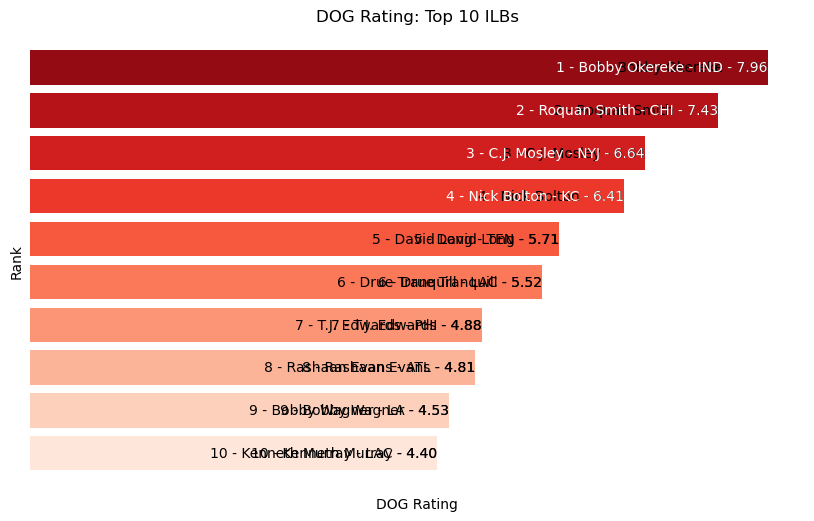

In [188]:
# Load the CSV file again to use the data for creating the chart
# Selecting only the relevant columns for the chart: Rank, DisplayName, and DOG_Rating_D
chart_data = top_10_ilbs[['displayName', 'DOG_Rating_D', 'defensiveTeam']].copy()

# Adding a 'Rank' column based on the 'DOG_Rating_D' sorting
chart_data['Rank'] = chart_data['DOG_Rating_D'].rank(ascending=False, method='min').astype(int)

# Sorting the data based on 'DOG_Rating_D' in descending order for the chart
chart_data_sorted = chart_data.sort_values('DOG_Rating_D', ascending=False)

# Creating a color palette that is a gradient of red, with higher ratings having a brighter color
color_palette = sns.color_palette("Reds_r", len(chart_data_sorted))

# Creating a figure for the chart
plt.figure(figsize=(10, 6))

# Adding rows to the chart with gradient colors
counter = 0
for _, row in chart_data_sorted.iterrows():
    plt.barh(row['displayName'], row['DOG_Rating_D'], color=color_palette[counter])
    counter += 1

# Adding text for the Rank, DisplayName, and DOG_Rating_D
counter = 0
for _, row in chart_data_sorted.iterrows():
    plt.text(row['DOG_Rating_D'], counter, f"{row['Rank']} - {row['displayName']} - {row['DOG_Rating_D']:.2f}", 
             va='center', ha='right', color='black')
    counter += 1

# Inverting y-axis to have the highest rank on top
plt.gca().invert_yaxis()

# Removing x-axis as we included the DOG_Rating_D in the text
plt.xlabel('DOG Rating')
plt.xticks([])

# Removing y-axis as we included the DisplayName in the text
plt.ylabel('Rank')
plt.yticks([])

# Removing spines
# Adding text for the Rank, DisplayName, and DOG_Rating_D
counter = 0
for _, row in chart_data_sorted.iterrows():
    if counter < 4:
        text_color = 'white'
    else:
        text_color = 'black'
    plt.text(row['DOG_Rating_D'], counter, f"{row['Rank']} - {row['displayName']} - {row['defensiveTeam']} - {row['DOG_Rating_D']:.2f}", 
             va='center', ha='right', color=text_color)
    counter += 1

# Removing spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Setting the title
title = 'DOG Rating: Top 10 ILBs'
plt.title(title)

# Show the plot
plt.show()

#### **3.2.2: OLBs**

In [116]:
players.position.value_counts()

position
WR     218
CB     191
OLB    140
DT     127
RB     125
TE     125
DE     125
T      121
G      103
ILB     93
FS      78
SS      64
QB      61
C       55
NT      31
FB      13
MLB     11
LS       1
DB       1
Name: count, dtype: int64

In [196]:
top_10_edge = players[(players['position'] == 'OLB') | (players['position'] == 'DE')].sort_values('DOG_Rating_D', ascending=False).head(10)
top_10_edge

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
282,42929,6-2,242,1993-12-07,Montana State,OLB,Alex Singleton,0.016631,0.008316,NaN,NaN,0.066526,3.744837,0.133051,1.912611,NaN,5.881972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,DEN,NaN
827,47854,6-3,281,1997-01-05,Ohio State,DE,Dre'Mont Jones,0.016631,1.729666,NaN,1.729666,NaN,0.834342,NaN,1.275074,NaN,5.585379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,DEN,NaN
149,41300,6-2,235,1992-08-31,Iowa,OLB,Christian Kirksey,1.108760,0.000000,0.274418,0.814939,0.080385,NaN,2.594498,0.582099,0.024947,5.480046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,HOU,NaN
694,46304,6-0,236,1996-07-02,Syracuse,OLB,Zaire Franklin,0.873149,0.321540,0.435188,0.776132,0.002772,1.438616,0.194033,0.543292,0.853745,5.438468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,IND,NaN
1294,53509,6-3,223,NaN,Virginia Tech,OLB,Divine Deablo,0.814939,0.160770,0.582099,0.002772,0.282734,NaN,3.459331,0.016631,NaN,5.319276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,LV,NaN
854,47889,6-5,255,1997-08-22,Eastern Michigan,DE,Maxx Crosby,1.649281,-0.184221,0.582099,0.000000,0.210664,NaN,1.729666,0.000000,1.275074,5.262562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,LV,NaN
883,47947,6-4,230,1995-06-01,Tarleton State,OLB,E.J. Speed,1.729666,0.878692,NaN,0.194033,0.000000,1.275074,0.776132,0.210664,NaN,5.064261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,IND,NaN
1278,53489,6-3,242,NaN,Ohio State,OLB,Pete Werner,0.044350,1.047778,1.211320,0.548836,0.016631,0.468451,0.321540,0.864833,NaN,4.523741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NO,NaN
139,41269,6-3,250,1991-03-26,Brigham Young,OLB,Kyle Van Noy,0.864833,0.174630,0.798307,1.729666,0.637537,NaN,0.263330,NaN,NaN,4.468303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,LAC,NaN
1239,53448,6-4,234,NaN,Kentucky,OLB,Jamin Davis,1.275074,0.000000,0.024947,0.000000,0.587643,0.498942,0.681887,0.593187,0.049894,3.711574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,WAS,NaN


In [197]:
top_10_edge_ex = top_10_edge[['displayName', 'position', 'DOG_Rating_D', 'defensiveTeam']]
top_10_edge_ex

,displayName,position,DOG_Rating_D,defensiveTeam
282,Alex Singleton,OLB,5.881972,DEN
827,Dre'Mont Jones,DE,5.585379,DEN
149,Christian Kirksey,OLB,5.480046,HOU
694,Zaire Franklin,OLB,5.438468,IND
1294,Divine Deablo,OLB,5.319276,LV
854,Maxx Crosby,DE,5.262562,LV
883,E.J. Speed,OLB,5.064261,IND
1278,Pete Werner,OLB,4.523741,NO
139,Kyle Van Noy,OLB,4.468303,LAC
1239,Jamin Davis,OLB,3.711574,WAS


In [198]:
top_10_edge_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_10_edge_ex.csv', index=False)

#### **3.2.3: CBs**

In [118]:
top_10_cbs = players[players['position'] == 'CB'].sort_values('DOG_Rating_D', ascending=False).head(10)
top_10_cbs

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O
1108,52546,6-1,193,1997-01-21,Louisiana Tech,CB,L'Jarius Sneed,0.338172,0.435188,1.186373,0.740097,0.917499,0.016631,0.077613,NaN,0.388066,4.099640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN
1477,54500,6-0,188,NaN,Auburn,CB,Roger McCreary,0.000000,0.285506,1.336056,0.052666,0.000000,NaN,0.177402,0.864833,0.421329,3.137791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN
183,42030,5-9,183,1991-07-12,Pittsburgh,CB,K'Waun Williams,0.000000,0.864833,0.000000,0.432416,0.033263,0.000000,0.055438,1.275074,NaN,2.661024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN
496,44964,5-10,201,1994-12-14,Iowa,CB,Desmond King,1.119848,0.000000,0.548836,0.027719,0.637537,NaN,0.038807,0.194033,0.038807,2.605586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN
1265,53476,5-10,180,NaN,Florida State,CB,Asante Samuel,0.013859,0.174630,0.637537,0.864833,0.637537,0.000000,0.249471,NaN,0.016631,2.594498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN
539,45287,5-9,190,1995-08-23,Valdosta State,CB,Kenny Moore,1.735209,0.080385,0.036035,0.199577,0.000000,0.000000,NaN,0.074841,0.000000,2.126047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN
1046,52469,6-0,200,1998-09-03,Louisiana State,CB,Kristian Fulton,0.000000,NaN,0.485083,0.000000,0.030491,NaN,0.604274,0.864833,0.000000,1.984680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN
1253,53462,6-2,185,NaN,Georgia,CB,Tyson Campbell,0.166314,NaN,0.407469,-0.080597,0.864833,0.094245,0.000000,0.000000,0.471223,1.923487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN
652,46190,5-11,192,1996-07-27,Weber State,CB,Taron Johnson,0.149683,0.194033,0.072069,0.000000,0.210664,0.013859,NaN,1.022831,0.213436,1.876576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN
795,47817,6-0,190,1996-05-23,Temple,CB,Rock Ya-Sin,0.814939,NaN,0.194033,NaN,0.000000,NaN,0.864833,0.000000,0.000000,1.873804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN


#### **3.3.3: DBs**

In [199]:
top_10_DBs = players[(players['position'] == 'SS') | (players['position'] == 'FS') | (players['position'] == 'DB') | (players['position'] == 'CB')].sort_values('DOG_Rating_D', ascending=False).head(10)
top_10_DBs

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
734,46669,5-11,210,1995-07-22,Missouri Western,FS,Jonathan Owens,3.894520,0.000000,0.274418,0.410241,0.637537,NaN,1.020059,0.194033,0.000000,6.430808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,HOU,NaN
1108,52546,6-1,193,1997-01-21,Louisiana Tech,CB,L'Jarius Sneed,0.338172,0.435188,1.186373,0.740097,0.917499,0.016631,0.077613,NaN,0.388066,4.099640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,KC,NaN
483,44926,6-1,220,1994-01-25,Miami,SS,Rayshawn Jenkins,0.166314,0.013859,0.426873,0.000000,2.594498,-0.072919,0.000000,0.000000,0.471223,3.599849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,JAX,NaN
433,44848,5-10,195,1996-01-10,Washington,SS,Budda Baker,0.268874,1.239680,0.296593,0.426873,0.038807,0.263330,0.000000,0.457364,0.532205,3.523726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,ARI,NaN
99,40039,6-1,205,1991-01-24,Rutgers,SS,Duron Harmon,0.407469,0.000000,0.194033,0.000000,0.174630,NaN,0.864833,-0.115138,1.912611,3.438438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,LV,NaN
17,35459,5-10,185,1988-04-10,Alabama,SS,Kareem Jackson,0.000000,0.008316,0.000000,1.297249,0.033263,0.814939,0.000000,1.275074,NaN,3.428840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,DEN,NaN
576,46086,6-2,215,1996-08-03,Florida State,FS,Derwin James,0.471223,0.327084,0.000000,0.864833,1.217505,0.188489,0.249471,NaN,0.016631,3.335237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,LAC,NaN
1620,54704,6-1,201,NaN,Yale,FS,Rodney Thomas,NaN,NaN,0.116420,0.194033,0.000000,1.992996,0.000000,0.030491,0.831570,3.165510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,IND,NaN
1477,54500,6-0,188,NaN,Auburn,CB,Roger McCreary,0.000000,0.285506,1.336056,0.052666,0.000000,NaN,0.177402,0.864833,0.421329,3.137791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,TEN,NaN
991,49410,5-11,190,1998-07-18,Washington State,FS,Jalen Thompson,0.130279,1.297249,0.063754,0.000000,-0.034541,0.498942,0.000000,0.274418,0.762273,2.992373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,ARI,NaN


In [200]:
top_10_DBs_ex = top_10_DBs[['displayName', 'position', 'DOG_Rating_D', 'defensiveTeam']]
top_10_DBs_ex

,displayName,position,DOG_Rating_D,defensiveTeam
734,Jonathan Owens,FS,6.430808,HOU
1108,L'Jarius Sneed,CB,4.099640,KC
483,Rayshawn Jenkins,SS,3.599849,JAX
433,Budda Baker,SS,3.523726,ARI
99,Duron Harmon,SS,3.438438,LV
17,Kareem Jackson,SS,3.428840,DEN
576,Derwin James,FS,3.335237,LAC
1620,Rodney Thomas,FS,3.165510,IND
1477,Roger McCreary,CB,3.137791,TEN
991,Jalen Thompson,FS,2.992373,ARI


In [201]:
top_10_DBs_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_10_DBs_ex.csv', index=False)

#### **3.3.4: DL**

In [202]:
top_10_dl = players[(players['position'] == 'DT') | (players['position'] == 'NT')].sort_values('DOG_Rating_D', ascending=False).head(10)
top_10_dl

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
494,44957,6-4,315,1993-10-20,"Albany State, Ga.",DT,Grover Stewart,1.729666,0.241155,0.174630,0.194033,0.002772,0.717922,1.358231,0.376978,0.415785,5.211172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,IND,NaN
312,43332,6-4,314,1994-05-08,Penn State,NT,Austin Johnson,0.000000,NaN,0.080385,2.594498,1.275074,0.282734,0.498942,NaN,0.063754,4.795387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,LAC,NaN
838,47867,6-0,324,1996-08-09,Western Illinois,DT,Khalen Saunders,0.000000,0.435188,1.663140,NaN,1.297249,NaN,0.388066,NaN,0.388066,4.171710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,KC,NaN
681,46264,6-4,310,1995-03-21,Rutgers,NT,Sebastian Joseph,NaN,0.291050,1.435844,0.864833,0.637537,0.188489,0.498942,NaN,0.000000,3.916695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,LAC,NaN
512,45011,6-0,321,1995-01-19,Mississippi,DT,D.J. Jones,0.000000,1.729666,NaN,0.432416,0.033263,0.000000,0.266102,1.275074,NaN,3.736521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,DEN,NaN
1582,54625,6-4,320,NaN,UCLA,DT,Otito Ogbonnia,0.432416,NaN,2.073381,NaN,NaN,0.094245,0.512801,NaN,0.063754,3.176597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,LAC,NaN
292,43296,6-7,300,1994-03-17,Oregon,DT,DeForest Buckner,0.000000,0.640309,0.196805,NaN,0.002772,0.160770,NaN,0.000000,1.663140,2.663796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,IND,NaN
776,47796,6-4,315,1995-12-20,Clemson,DT,Christian Wilkins,0.415785,0.000000,0.498942,0.149683,0.205121,0.182945,0.709606,0.000000,0.498942,2.661024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,MIA,NaN
317,43338,6-3,306,1992-12-16,Alabama,DT,Jarran Reed,0.199577,0.498942,0.349259,0.831570,0.000000,0.205121,0.210664,0.249471,NaN,2.544604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,GB,NaN
695,46307,6-6,290,1995-09-07,Ferris State,DT,Zach Sieler,0.000000,NaN,0.000000,0.299365,0.000000,0.091473,0.354803,0.000000,1.771244,2.516885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,MIA,NaN


In [203]:
top_10_dl_ex = top_10_dl[['displayName', 'position', 'DOG_Rating_D', 'defensiveTeam']]
top_10_dl_ex

,displayName,position,DOG_Rating_D,defensiveTeam
494,Grover Stewart,DT,5.211172,IND
312,Austin Johnson,NT,4.795387,LAC
838,Khalen Saunders,DT,4.171710,KC
681,Sebastian Joseph,NT,3.916695,LAC
512,D.J. Jones,DT,3.736521,DEN
1582,Otito Ogbonnia,DT,3.176597,LAC
292,DeForest Buckner,DT,2.663796,IND
776,Christian Wilkins,DT,2.661024,MIA
317,Jarran Reed,DT,2.544604,GB
695,Zach Sieler,DT,2.516885,MIA


In [204]:
top_10_dl_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_10_dl_ex.csv', index=False)

#### **3.3.5: Defensive Top 25**

In [221]:
top_25_d = players.sort_values('DOG_Rating_D', ascending=False).head(25)
top_25_d

,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
841,47872,6-1,234,1996-07-29,Stanford,ILB,Bobby Okereke,1.729666,3.190457,0.465679,0.776132,0.002772,0.243927,0.970165,0.166314,0.415785,7.960897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,IND,NaN
568,46077,6-0,230,1997-04-08,Georgia,ILB,Roquan Smith,0.135823,0.000000,4.324164,0.000000,0.299365,0.587643,2.078925,0.000000,0.000000,7.425920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,CHI,NaN
130,41243,6-2,250,1992-06-19,Alabama,ILB,C.J. Mosley,0.141367,1.912611,0.327084,0.371435,0.299365,1.363775,0.000000,2.101100,0.118986,6.635723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NYJ,NaN
734,46669,5-11,210,1995-07-22,Missouri Western,FS,Jonathan Owens,3.894520,0.000000,0.274418,0.410241,0.637537,NaN,1.020059,0.194033,0.000000,6.430808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,HOU,NaN
1276,53487,6-0,232,NaN,Missouri,ILB,Nick Bolton,0.338172,0.814939,1.186373,0.349259,2.175942,1.006200,0.543292,NaN,0.000000,6.414177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,KC,NaN
282,42929,6-2,242,1993-12-07,Montana State,OLB,Alex Singleton,0.016631,0.008316,NaN,NaN,0.066526,3.744837,0.133051,1.912611,NaN,5.881972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,DEN,NaN
891,47971,5-11,224,1996-10-12,West Virginia,ILB,David Long,0.000000,0.000000,1.336056,0.604274,0.543292,NaN,1.208548,1.729666,0.291050,5.712886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,TEN,NaN
827,47854,6-3,281,1997-01-05,Ohio State,DE,Dre'Mont Jones,0.016631,1.729666,NaN,1.729666,NaN,0.834342,NaN,1.275074,NaN,5.585379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,DEN,NaN
865,47913,6-2,234,1995-08-15,Notre Dame,ILB,Drue Tranquill,0.432416,0.407469,0.878692,0.864833,1.912611,0.188489,0.776132,NaN,0.063754,5.524397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,LAC,NaN
149,41300,6-2,235,1992-08-31,Iowa,OLB,Christian Kirksey,1.108760,0.000000,0.274418,0.814939,0.080385,NaN,2.594498,0.582099,0.024947,5.480046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,HOU,NaN


In [222]:
top_25_d_ex = top_25_d[['displayName', 'position', 'defensiveTeam', 'DOG_Rating_D']]
top_25_d_ex

,displayName,position,defensiveTeam,DOG_Rating_D
841,Bobby Okereke,ILB,IND,7.960897
568,Roquan Smith,ILB,CHI,7.425920
130,C.J. Mosley,ILB,NYJ,6.635723
734,Jonathan Owens,FS,HOU,6.430808
1276,Nick Bolton,ILB,KC,6.414177
282,Alex Singleton,OLB,DEN,5.881972
891,David Long,ILB,TEN,5.712886
827,Dre'Mont Jones,DE,DEN,5.585379
865,Drue Tranquill,ILB,LAC,5.524397
149,Christian Kirksey,OLB,HOU,5.480046


In [223]:
top_25_d_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/top_25_d_ex.csv', index=False)

#### **3.2.6: Bobby Okereke Weekly**

In [231]:
bobby_o = players[players['displayName'] == 'Bobby Okereke']
bobby_o


,nflId,height,weight,birthDate,collegeName,position,displayName,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D,DOG_Rating_O_W1,DOG_Rating_O_W2,DOG_Rating_O_W3,DOG_Rating_O_W4,DOG_Rating_O_W5,DOG_Rating_O_W6,DOG_Rating_O_W7,DOG_Rating_O_W8,DOG_Rating_O_W9,DOG_Rating_O,tackling_events_D,tackling_events_O,defensiveTeam,possessionTeam
841,47872,6-1,234,1996-07-29,Stanford,ILB,Bobby Okereke,1.729666,3.190457,0.465679,0.776132,0.002772,0.243927,0.970165,0.166314,0.415785,7.960897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,IND,NaN


In [232]:
bobby_o_ex = bobby_o[['displayName',
                      'position',
                      'defensiveTeam',
                      'DOG_Rating_D_W1',
                      'DOG_Rating_D_W2',
                      'DOG_Rating_D_W3',
                      'DOG_Rating_D_W4',
                      'DOG_Rating_D_W5',
                      'DOG_Rating_D_W6',
                      'DOG_Rating_D_W7',
                      'DOG_Rating_D_W8',
                      'DOG_Rating_D_W9',
                      'DOG_Rating_D']]
bobby_o_ex

,displayName,position,defensiveTeam,DOG_Rating_D_W1,DOG_Rating_D_W2,DOG_Rating_D_W3,DOG_Rating_D_W4,DOG_Rating_D_W5,DOG_Rating_D_W6,DOG_Rating_D_W7,DOG_Rating_D_W8,DOG_Rating_D_W9,DOG_Rating_D
841,Bobby Okereke,ILB,IND,1.729666,3.190457,0.465679,0.776132,0.002772,0.243927,0.970165,0.166314,0.415785,7.960897


In [233]:
bobby_o_ex.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/bobby_o_ex.csv', index=False)